<a href="https://colab.research.google.com/github/shrisha337-beep/Library-Slip-Tracker/blob/main/Library_slip_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Installing Dependencies

In [40]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Step 1: Installing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Corrected import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Generate Synthetic DataSet (500 entries)

In [42]:
#SetUp
np.random.seed(42)
student = ['Raghav Singh','Rahul Sharma','Anjali Khanna','Khushi Mukhija','Shreeja Chaturvedi','Megha Jain','Kunal Mehta','Ananya Shroff','Karan Ahuja','Sneha Kapoor',
                 'Rohit Kashyap','Megha Jain','Vivek Agrawal','Isha Khanna','Aman Verma','Priya Desai','Shreya Sharma']
books = ['Introduction to ML','Python Basics','Data Science with Python','Modern Web-Dev','Operating Systems','Linear Algebra','Digital Circutis',
                'Database Systems','Advanced Machine Learning','Artificial Intelligence','Electronic Circuits']
departments = ['CS','Math','Electronics','AI','Web Dev']
librarians = ['Mrs. Batra','Mr. Khurana','Ms. Sheikh','Mrs. Kapoor','Mr. Ahuja']

#Settings
n = 500
fine_per_day = 1
start_date = datetime(2025,1,1)

#17 offsets from -2 to 14
return_offsets = list(range(-2,15))
#17 probabilities matching above
probabilities = np.array([0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.06,
                          0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                          0.05, 0.05, 0.05])
#Normalize to sum to 1.0
probabilities = probabilities/probabilities.sum()

#Generate Data
data = []
for i in range(n):
    slip_id = f"SLIP{i+1:05d}"
    student = random.choice(student)
    book = random.choice(books)
    department = random.choice(departments)
    librarian = random.choice(librarians)

    issue_date = start_date + timedelta(days=random.randint(0,365))
    due_date = issue_date + timedelta(days=14) # Due date should be relative to issue date
    return_offset = random.choices(return_offsets, weights=probabilities, k=1)[0]
    return_date = due_date + timedelta(days=int(return_offset)) # Calculate return_date relative to due_date

    delay_days = max(0,(return_date - due_date).days)
    fine_amount = delay_days * fine_per_day

    data.append([slip_id, student, book, department, librarian, issue_date, due_date, return_date, delay_days, fine_amount])

# Create and Save Dataframe
columns = ['Slip_Id','Student','Book','Department','Librarian','Issue_Date','Due_Date','Return_Date','Delay_Days','Fine']
df = pd.DataFrame(data,columns=columns)
df.to_csv('library_slip_tracker.csv',index=False)
print("Synthetic dataset generated and saved as 'library_slip_tracker.csv")

Synthetic dataset generated and saved as 'library_slip_tracker.csv


Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [43]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


Step 4: EDA (Exploratory Data Analysis)

Shape of the data: (500, 10)

First 5 rows:
      Slip_Id     Student                      Book Department    Librarian  \
0  SLIP00001  Aman Verma        Introduction to ML         AI   Ms. Sheikh   
1  SLIP00002           e   Artificial Intelligence         AI   Mrs. Batra   
2  SLIP00003           e  Data Science with Python       Math   Mrs. Batra   
3  SLIP00004           e            Linear Algebra       Math  Mr. Khurana   
4  SLIP00005           e             Python Basics    Web Dev  Mrs. Kapoor   

   Issue_Date    Due_Date Return_Date  Delay_Days  Fine  
0  2025-08-10  2025-08-24  2025-09-05          12    12  
1  2025-09-12  2025-09-26  2025-10-02           6     6  
2  2025-05-19  2025-06-02  2025-06-09           7     7  
3  2025-02-10  2025-02-24  2025-02-28           4     4  
4  2025-10-10  2025-10-24  2025-11-05          12    12  

Data Types:
 Slip_Id        object
Student        object
Book           object
Department     object
Librarian      object
Issue_Date    

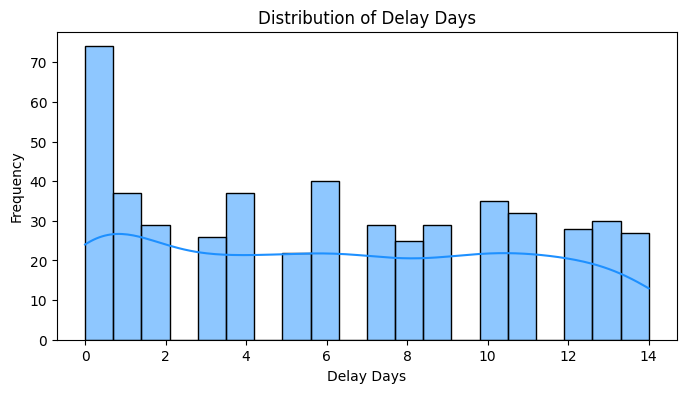

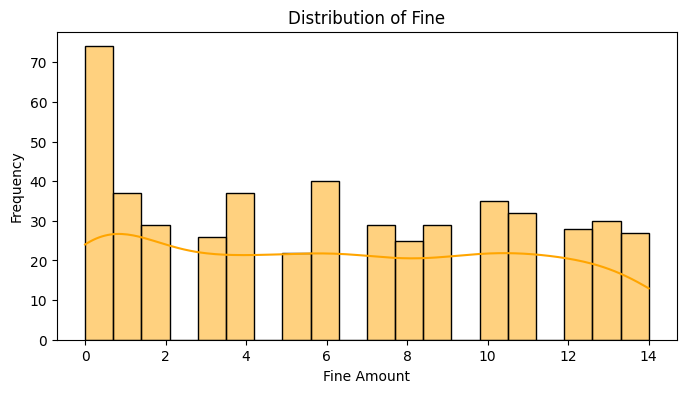

/tmp/ipython-input-4091869484.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')


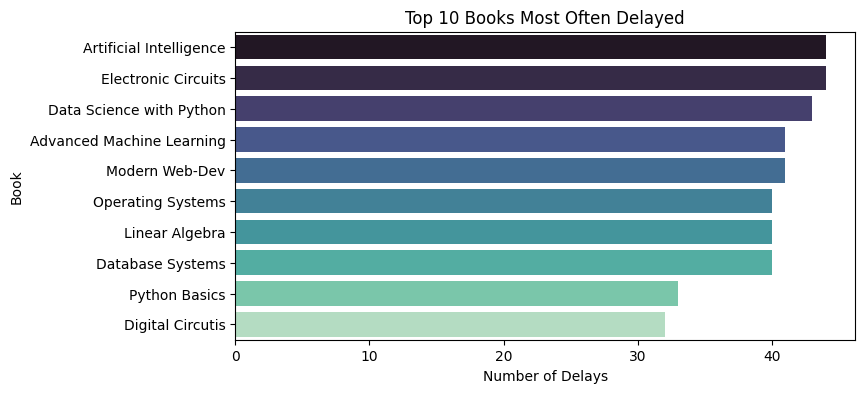

/tmp/ipython-input-4091869484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')


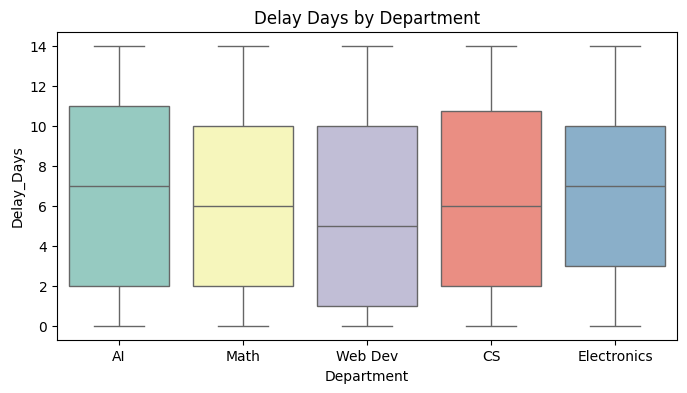

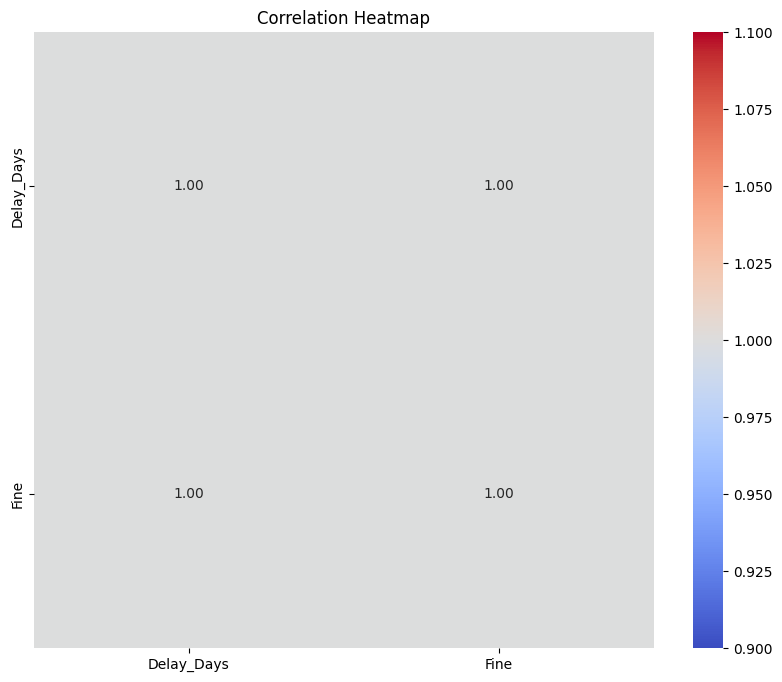

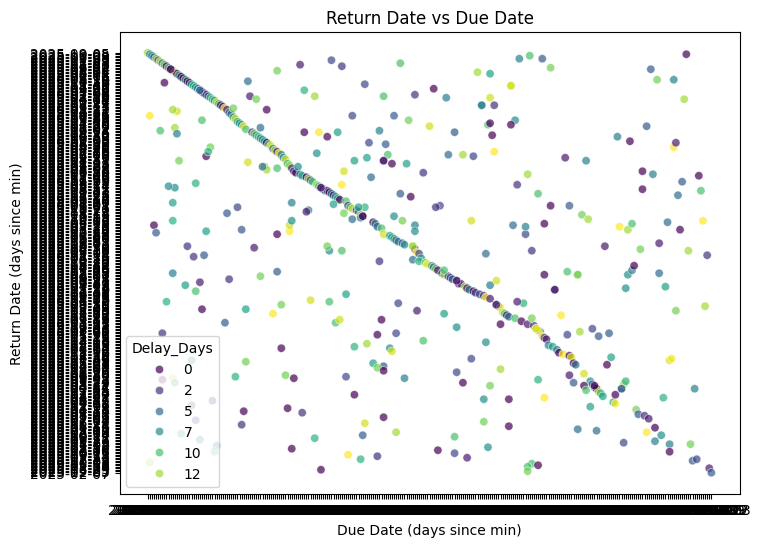

/tmp/ipython-input-4091869484.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')


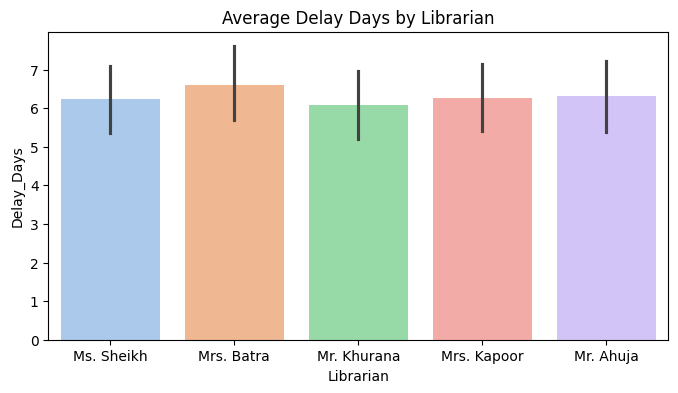


EDA completed. Insights can be used to inform feature engineering and modeling.


In [44]:
# 1. Basic Information
print("Shape of the data:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# 2. Value Counts for Categorical Columns
categorical_cols = ['Student', 'Book', 'Department', 'Librarian']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# 3. Distribution of Delay_Days
plt.figure(figsize=(8,4))
sns.histplot(df['Delay_Days'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Delay Days')
plt.xlabel('Delay Days')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Fine
plt.figure(figsize=(8,4))
sns.histplot(df['Fine'], bins=20, kde=True, color='orange')
plt.title('Distribution of Fine')
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.show()

# 5. Books Most Often Delayed
delayed_books = df[df['Delay_Days']>0]['Book'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')
plt.title('Top 10 Books Most Often Delayed')
plt.xlabel('Number of Delays')
plt.ylabel('Book')
plt.show()

# 6. Delay by Department
plt.figure(figsize=(8,4))
sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')
plt.title('Delay Days by Department')
plt.show()

# 7. Correlation Heatmap (numerical features)
plt.figure(figsize=(10,8))
numerical_cols = df.select_dtypes(include=['number']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 8. Return Date vs Due Date (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Due_Date', y='Return_Date', data=df, hue='Delay_Days', palette='viridis', alpha=0.7)
plt.title('Return Date vs Due Date')
plt.xlabel('Due Date (days since min)')
plt.ylabel('Return Date (days since min)')
plt.show()

# 9. Delays by Librarian
plt.figure(figsize=(8,4))
sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')
plt.title('Average Delay Days by Librarian')
plt.show()

# 10. Delays over Time (if Issue_Date is available as datetime)
if 'Issue_Date' in df.columns and (df['Issue_Date'].dtype == 'int64' or df['Issue_Date'].dtype == 'float64'):
    plt.figure(figsize=(10,4))
    sns.lineplot(x='Issue_Date', y='Delay_Days', data=df, estimator='mean')
    plt.title('Average Delay Days Over Issue Time')
    plt.xlabel('Issue Date (days since min)')
    plt.ylabel('Avg Delay Days')
    plt.show()

print("\nEDA completed. Insights can be used to inform feature engineering and modeling.")

Step 4: Preprocessing the Data

In [45]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Data Preprocessing


Step 5: Train-Test Split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

Step 6: Model Training

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


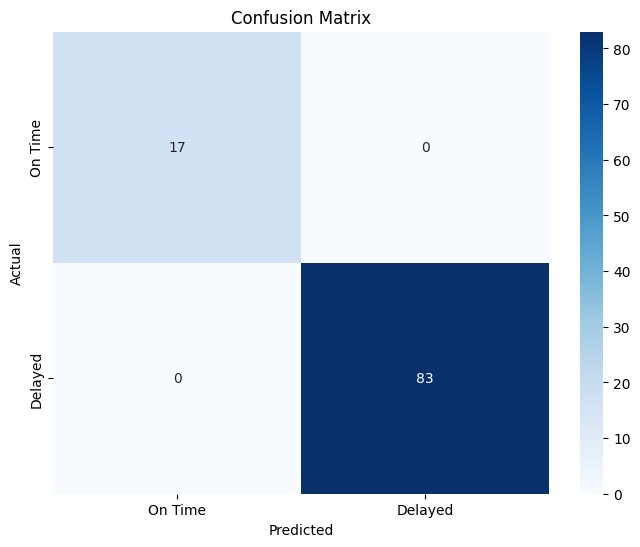


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        83

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [48]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed']) # Corrected ytickables to yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

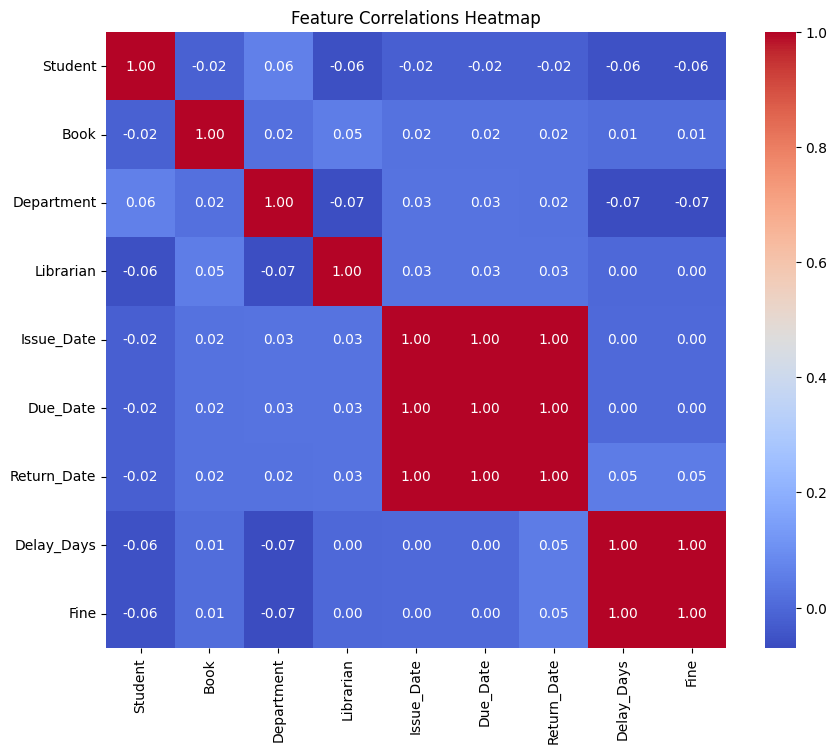

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance


/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


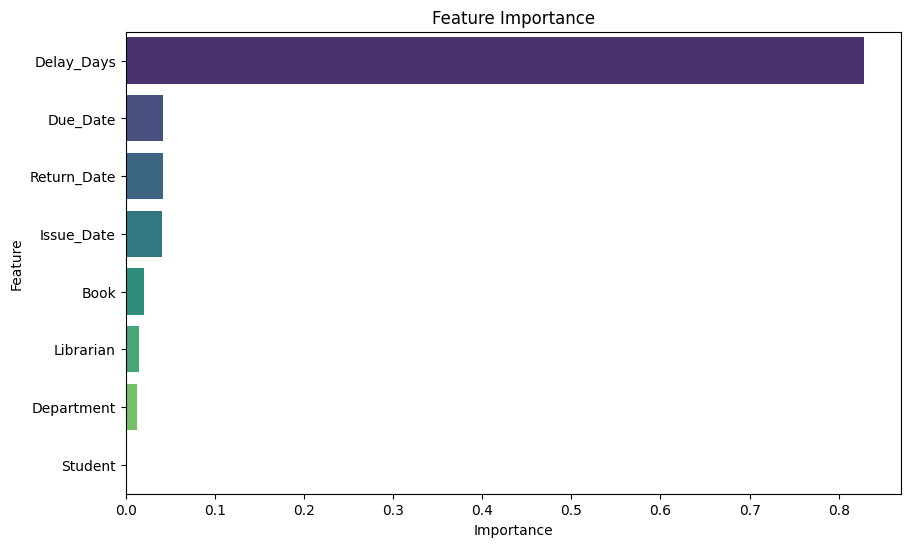

In [50]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [51]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

display(df.head())

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


,Slip_Id,Student,Book,Department,Librarian,Issue_Date,Due_Date,Return_Date,Delay_Days,Fine
0,SLIP00001,Aman Verma,Introduction to ML,AI,Ms. Sheikh,2025-08-10,2025-08-24,2025-09-05,12,12
1,SLIP00002,e,Artificial Intelligence,AI,Mrs. Batra,2025-09-12,2025-09-26,2025-10-02,6,6
2,SLIP00003,e,Data Science with Python,Math,Mrs. Batra,2025-05-19,2025-06-02,2025-06-09,7,7
3,SLIP00004,e,Linear Algebra,Math,Mr. Khurana,2025-02-10,2025-02-24,2025-02-28,4,4
4,SLIP00005,e,Python Basics,Web Dev,Mrs. Kapoor,2025-10-10,2025-10-24,2025-11-05,12,12


Step 4: Preprocessing the Data

In [52]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled)
display(Y)


 Data Preprocessing


array([[-22.3383079 ,   0.3727701 ,  -1.3703627 , ...,   0.44972739,
          0.50541797,   1.25537068],
       [  0.04476615,  -1.19612762,  -1.3703627 , ...,   0.76819019,
          0.76565454,  -0.0619123 ],
       [  0.04476615,  -0.88234808,   0.75313322, ...,  -0.35125483,
         -0.34276048,   0.15763486],
       ...,
       [  0.04476615,   1.00032919,  -0.66253073, ...,   0.98049873,
          1.0355295 ,   1.25537068],
       [  0.04476615,   1.31410873,   0.04530125, ...,  -1.51895179,
         -1.53792101,  -0.50100663],
       [  0.04476615,   0.68654964,   0.04530125, ...,  -1.49965101,
         -1.51864423,  -0.50100663]])

,Delay_Days
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


Step 5: Train-Test Split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 0.04476615 -1.19612762 -1.3703627  ... -1.65405722 -1.57647458
   1.69446501]
 [ 0.04476615 -0.56856853  0.75313322 ...  0.5172801   0.48614119
  -0.72055379]
 [ 0.04476615  0.05899055  1.46096519 ...  1.07700261  0.99697593
  -1.37919528]
 ...
 [ 0.04476615  1.31410873  1.46096519 ...  0.0347607   0.11024392
   1.69446501]
 [ 0.04476615 -0.56856853  0.04530125 ...  0.01545992  0.05241357
   0.81627635]
 [ 0.04476615  1.00032919 -0.66253073 ...  1.62707474  1.57527941
  -1.15964812]]
249    1
433    1
19     0
322    1
332    1
      ..
106    1
270    1
348    1
435    1
102    1
Name: Delay_Days, Length: 400, dtype: int64
[[ 4.47661481e-02 -5.68568535e-01  1.46096519e+00 -7.57258900e-01
  -1.22944014e+00 -1.22944014e+00 -1.22949248e+00 -6.19123002e-02]
 [ 4.47661481e-02  5.89905544e-02  4.53012462e-02 -1.46763310e+00
  -1.33559441e+00 -1.33559441e+00 -1.32587640e+00  1.57634864e-01]
 [ 4.47661481e-02 -1.19612762e+00 -6.62530726e-01 -7.57258900e-01
  -1.58650450e+00 -1.58650450e+00

Step 6: Model Training

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

print(model)

RandomForestClassifier(random_state=42)


Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


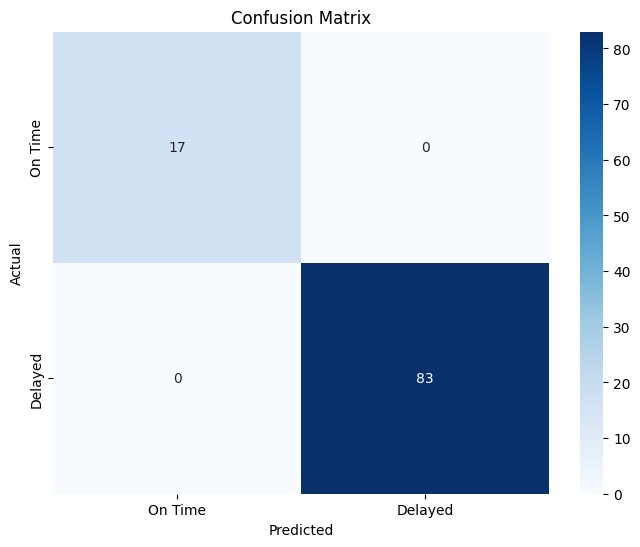


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        83

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [55]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

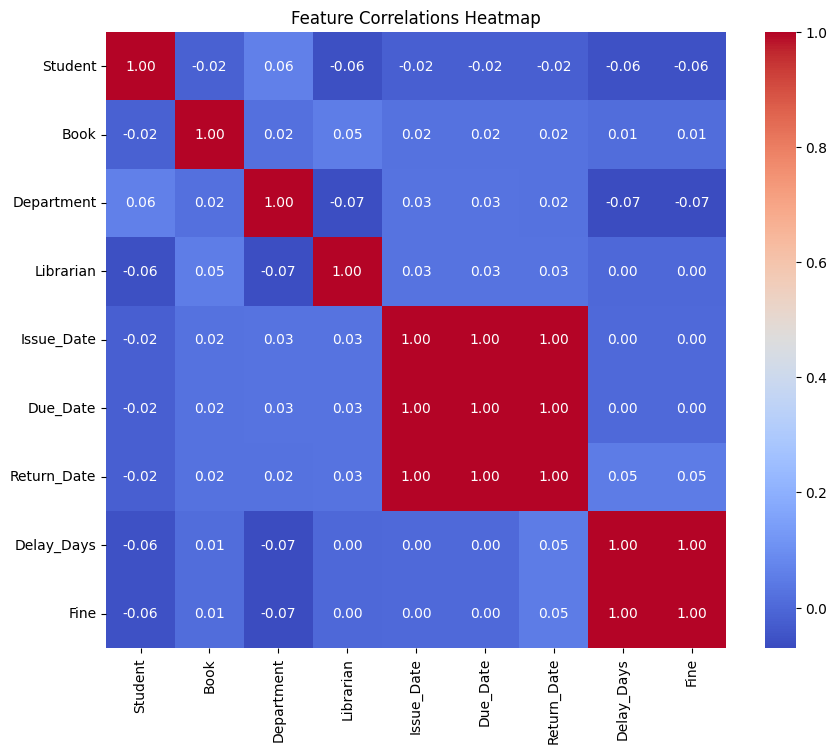

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance

/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


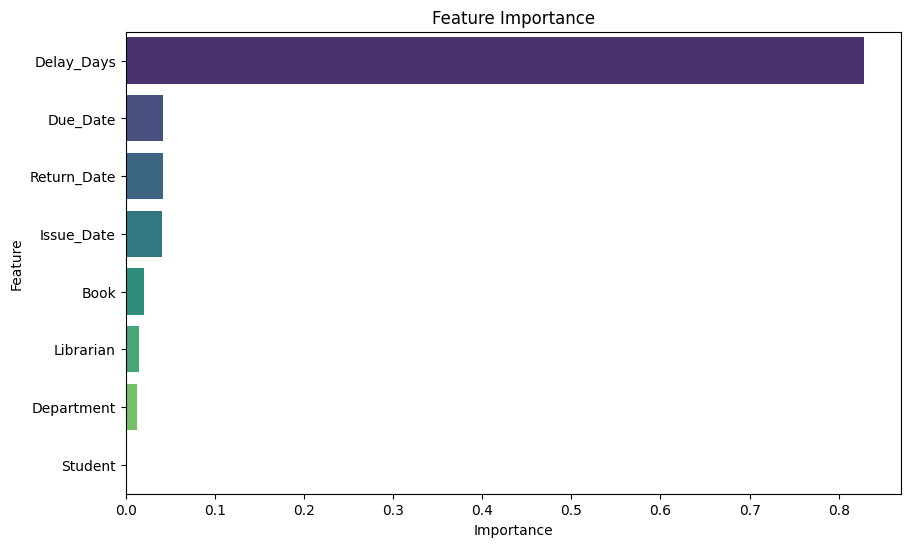

In [57]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()